Types of Clustering:
1) K-means Clustering:
    ex. Customer Segmentation, Clustering text documents, Image Compression, Anomaly Detection etc.

2) Hierarchical Clustering:
    ex. Amazon's Home Page

3) t-SNE Clustering:
    ex. Used for visualization of clustering.

4) DB-SCAN Clustering:
    ex. In place of K-means as dont need to mention no. of clusters initially.
    
    

In [83]:
import numpy as np
from sklearn import datasets # we need digits dataset from here
from sklearn.preprocessing import StandardScaler # this will reduce mean to 0 and standard deviation to 1 for each feature
from sklearn.pipeline import make_pipeline # this helps us to apply standard scalar to our k-means
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [84]:
np.random.seed(10) # initial random seed
mnist = datasets.load_digits() # load dataset


In [85]:
type(mnist)

sklearn.utils.Bunch

In [86]:
help(mnist)

Help on Bunch in module sklearn.utils object:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |  
 |  Container object for datasets
 |  
 |  Dictionary-like object that exposes its keys as attributes.
 |  
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Implement setattr(self, name, value).
 |  
 |  __setstate__(self, state)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__


In [87]:
mnist.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [88]:
mnist.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [89]:
type(mnist['data'])

numpy.ndarray

Will create our model by choosing n number of clusters.

In [90]:
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
 |  
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centroids

In [91]:
model = KMeans(n_clusters=10)

In [92]:
model.fit(mnist.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [93]:
labels = model.predict(mnist.data)

In [95]:
from sklearn.manifold import TSNE

# Defining Model
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(mnist.data)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]


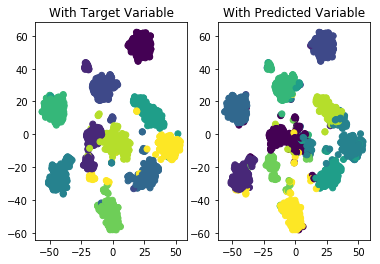

In [96]:
plt.subplot(1,2,1)
plt.scatter(x_axis, y_axis, c=mnist.target)
plt.title("With Target Variable")

plt.subplot(1,2,2)
plt.scatter(x_axis, y_axis, c=labels)
plt.title("With Predicted Variable")

plt.show()

In [ ]:
print(labels)
print(mnist.target)

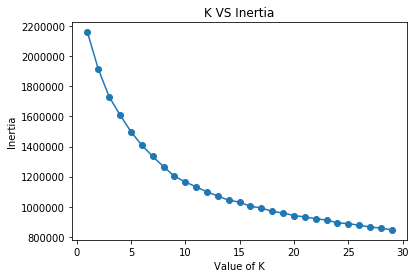

In [97]:
inertias = []

for k in range(1, 30):
    model = KMeans(n_clusters=k)
    model.fit(mnist['data'])
    inertias.append(model.inertia_)
    
plt.plot(list(range(1, 30)), inertias, '-o')
plt.title('K VS Inertia')
plt.xlabel('Value of K')
plt.ylabel('Inertia')
plt.show()

In [98]:
from sklearn.pipeline import make_pipeline # this helps us to apply standard scalar to our k-means


In [99]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters = 10)
pipeline = make_pipeline(scaler, kmeans)

In [105]:
pipeline.fit(mnist['data'])
standardized_labels = pipeline.predict(mnist['data'])

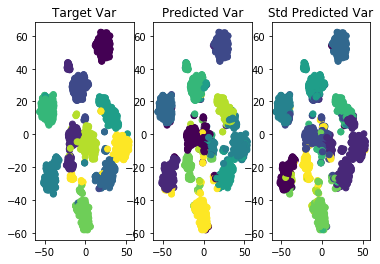

In [101]:



plt.subplot(1,3,1)
plt.scatter(x_axis, y_axis, c=mnist.target,  cmap='viridis')
plt.title("Target Var")

plt.subplot(1,3,2)
plt.scatter(x_axis, y_axis, c=labels,  cmap='viridis')
plt.title("Predicted Var")

plt.subplot(1,3,3)
plt.scatter(x_axis, y_axis, c=standardized_labels,  cmap='viridis')
plt.title("Std Predicted Var")

plt.show()